## Задание 1. Нелинейный математический маятник

Рассматривается модель [нелинейного математического маятника](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BC%D0%B0%D1%8F%D1%82%D0%BD%D0%B8%D0%BA).

Сформулируйте модель колебательной системы, в которой маятник в течение первых ${\sim}10$ секунд находится в покое, а затем выполняет **одно полное вращение (один оборот)** под действием внешней силы $F(t)$. После этого колебания маятника должны **постепенно затухать**.

Требуется, чтобы:

- к концу наблюдения амплитуда колебаний не превышала 0.1 рад относительно положения $2\pi$ в течение последних 5 секунд;
- при амплитуде колебаний маятника приблизительно $\pi$ угловая скорость была меньше $10^{-3}$ рад/с;
- сила $F(t)$ задавалась непрерывной функцией времени, зависящей только от $t$ и не зависящей от состояния маятника.

Постройте графики зависимости угла и угловой скорости от времени, а также фазовый портрет исследуемой системы.

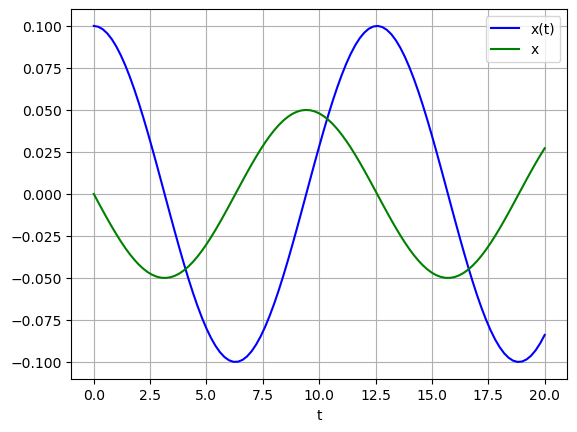

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

# сигнатура функции для solve_ivp: f(t, y)
def pend(t, y):
    s, v = y
    dydt = [v, -0.25 * s]
    return dydt

# начальные условия
y0 = [0.1, 0.0]  # [s(0) = 0, v(0) = 100]

# только для первых 20 секунд итерируем
t_span = (0, 20) 
t_eval = np.linspace(0, 20, 101) 

sol = solve_ivp(pend, t_span, y0, method='DOP853', rtol=1e-08, t_eval=t_eval)

# находим индекс, где скорость становится < 0
index = np.where(sol.y[1] < 0)[0][0]

# берем данные только до этой точки
t_val = sol.t[:index]    # здесь время
s_val = sol.y[0][:index] # здесь путь
v_val = sol.y[1][:index] # здесь скорость

plt.plot(sol.t, sol.y[0], 'b', label='x(t)')
plt.plot(sol.t, sol.y[1], 'g', label='x')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


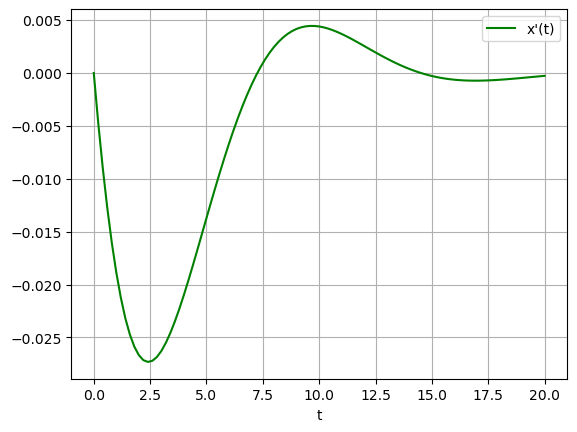

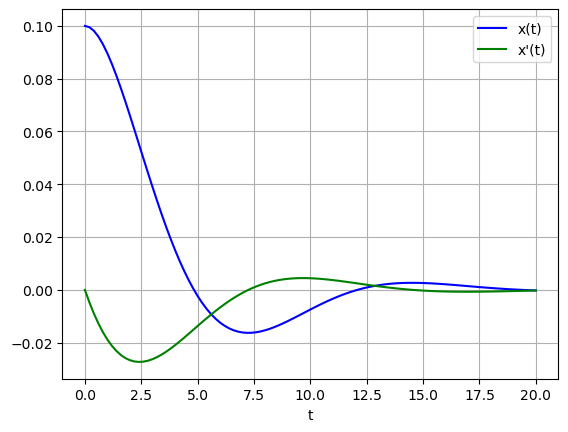

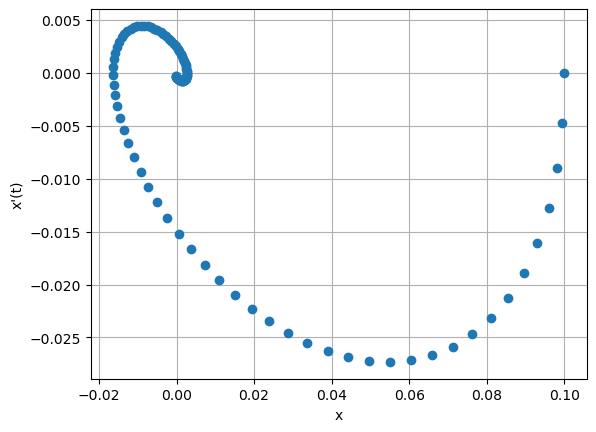

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# F(t)
def F(t):
    return 1.0*np.exp(-(t - 5)**2)

# сигнатура функции для solve_ivp: f(t, y)
def pend(t, y):
    s, v = y
    dydt = [v, -0.25*s - 0.5*v] # 0.5^2 = 0.25
    return dydt

# начальные условия
y0 = [0.1, 0.0]  # [x(0) = 0.1, x'(0) = 0]

# только для первых 20 секунд итерируем
t_span = (0, 20)
t_eval = np.linspace(0, 20, 101)

sol = solve_ivp(pend, t_span, y0, method='DOP853', rtol=1e-08, atol=1e-08, t_eval=t_eval)

plt.plot(sol.t, sol.y[1], 'g', label='x\'(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.plot(sol.t, sol.y[0], 'b', label='x(t)')
plt.plot(sol.t, sol.y[1], 'g', label='x\'(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

plt.plot(sol.y[0], sol.y[1], 'o') # sol.y[0] - x(t), sol.y[1] - x'(t)
# plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('x\'(t)')
plt.grid()
plt.show()


## Пример результатов в задании 1


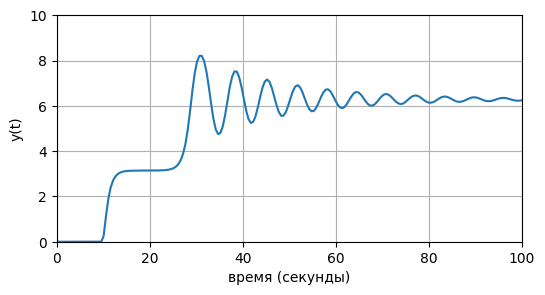

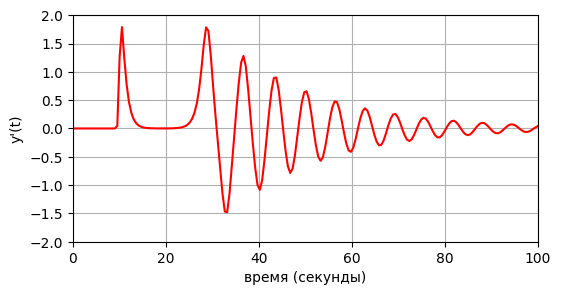

[Пример анимации.](https://drive.google.com/file/d/1Tb__aErARs_0kypMPTNhnS9WBlBwxYFA/view?usp=sharing)


A = 15.9900000000, v(pi) = 0.7070933258
A = 15.9800000000, v(pi) = 0.6727152550
A = 15.9700000000, v(pi) = 0.6371375389
A = 15.9600000000, v(pi) = 0.5987788530
A = 15.9500000000, v(pi) = 0.5591750585
A = 15.9400000000, v(pi) = 0.5164039101
A = 15.9300000000, v(pi) = 0.4699754241
A = 15.9200000000, v(pi) = 0.4188185482
A = 15.9100000000, v(pi) = 0.3612223620
A = 15.9000000000, v(pi) = 0.2937174105
A = 15.8900000000, v(pi) = 0.2070311664
A = 15.8800000000, v(pi) = 0.0409360058
A = 15.8799000000, v(pi) = 0.0360499749
A = 15.8798000000, v(pi) = 0.0304981015
A = 15.8797000000, v(pi) = 0.0237562158
A = 15.8796000000, v(pi) = 0.0144720252
A = 15.8795990000, v(pi) = 0.0143545952
A = 15.8795980000, v(pi) = 0.0142352796
A = 15.8795970000, v(pi) = 0.0141140325
A = 15.8795960000, v(pi) = 0.0139908066
A = 15.8795950000, v(pi) = 0.0138655531
A = 15.8795940000, v(pi) = 0.0137382216
A = 15.8795930000, v(pi) = 0.0136087598
A = 15.8795920000, v(pi) = 0.0134771139
A = 15.8795910000, v(pi) = 0.0133432281


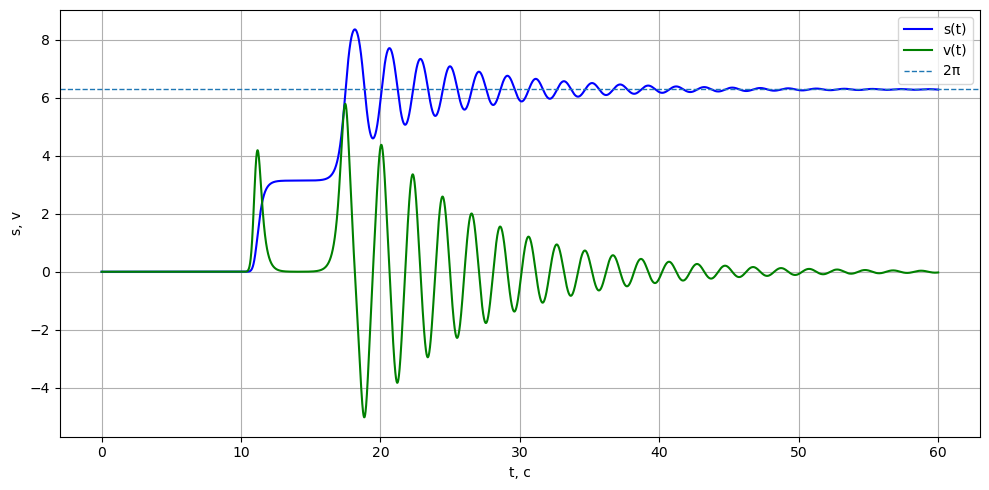

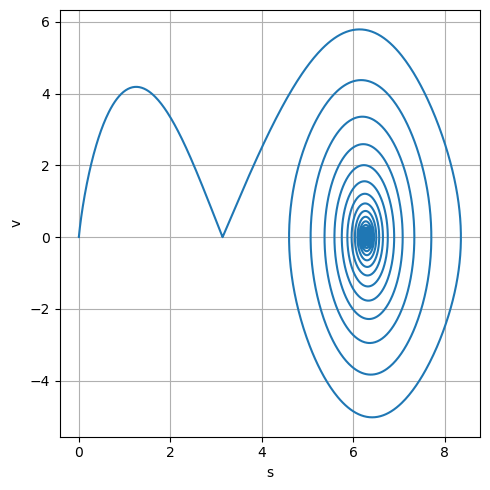

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.8
L = 1.0

t_full = 60.0
t_span = (0.0, t_full)
t_eval = np.linspace(0.0, t_full, 10001)

def F2(t, A):
    t0 = 11.0
    sigma = 0.2
    return A * np.exp(-0.5 * ((t - t0) / sigma) ** 2)

def F3(t, A):
    t0 = 13.0
    sigma = 0.2
    return A * np.exp(-0.5 * ((t - t0) / sigma) ** 2)

# правая часть уравнения маятника
def pen1(t, y, A):
    """
    y = (s, v): угол и угловая скорость.
    Маятник с внешней силой F2(t, A).
    """
    s, v = y
    dsdt = v
    dvdt = -0.25 * v - (g / L) * np.sin(s) + F2(t, A)   # F(t) зависит только от t
    return [dsdt, dvdt]

def pen2(t, y, A):
    """Вариант с F3(t, A) — на случай экспериментов."""
    s, v = y
    dsdt = v
    dvdt = -0.25 * v - (g / L) * np.sin(s) + F3(t, A)
    return [dsdt, dvdt]

def vel_at_pi(A, t_full=60.0):
    y0 = [0.0, 0.0]
    t_span = (0.0, t_full)
    t_eval = np.linspace(0.0, t_full, 2001)

    sol = solve_ivp(
        pen1, t_span, y0,
        args=(A,),
        method='DOP853',
        rtol=1e-8, atol=1e-8,
        t_eval=t_eval
    )

    s = sol.y[0]
    v = sol.y[1]

    for i in range(1, len(s)):
        if s[i-1] < np.pi <= s[i]:
            ratio = (np.pi - s[i-1]) / (s[i] - s[i-1])
            v_pi = v[i-1] + ratio * (v[i] - v[i-1])
            return v_pi
    return np.nan

# |v(pi)| < 1e-3
A = 16.0
dA = 0.01

while True:
    A_next = A - dA
    v_next = vel_at_pi(A_next)

    if np.isnan(v_next):
        # маятник уже не долетает до pi — шаг слишком крупный
        dA /= 100.0
        continue

    print(f"A = {A_next:.10f}, v(pi) = {v_next:.10f}")

    if abs(v_next) < 1e-3:
        A = A_next
        break

    A = A_next

print(f"\nПодобранная амплитуда A ≈ {A:.12f}")

y0 = [0.0, 0.0]
sol = solve_ivp(
    pen1, t_span, y0,
    args=(A,),
    method='DOP853',
    rtol=1e-8, atol=1e-8,
    t_eval=t_eval
)

t = sol.t
s = sol.y[0]
v = sol.y[1]

mask_last = t >= (t_full - 5.0)
s_last = s[mask_last]

two_pi = 2 * np.pi
s_last_centered = ((s_last + np.pi) % two_pi) - np.pi
amp_last = np.max(np.abs(s_last_centered))

print(f"Максимальная амплитуда в последние 5 секунд ≈ {amp_last:.5f} рад")

# угол и скорость от времени
plt.figure(figsize=(10, 5))
plt.plot(t, s, 'b', label='s(t)')
plt.plot(t, v, 'g', label='v(t)')
plt.axhline(2 * np.pi, linestyle='--', linewidth=1, label='2π')
plt.xlabel('t, c')
plt.ylabel('s, v')
plt.grid(True)
plt.legend()
plt.tight_layout()

# фазовый портрет (s, v)
plt.figure(figsize=(5, 5))
plt.plot(s, v)
plt.xlabel('s')
plt.ylabel('v')
plt.grid(True)
plt.tight_layout()

plt.show()
